# **Music Genre Classification**

In [265]:
#importing required libraries
import numpy as np    #for working with array
import pandas as pd   #for working with dataframes
import matplotlib.pyplot as plt
import seaborn as sns # for data visualization 
import librosa #extracting audio features
import librosa.display
from IPython.display import Audio
import IPython
import scipy
import sys
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


In [266]:
#loading the data in the dataframe
df=pd.read_csv("features_3_sec.csv")

### **Data-Preprocessing**

In [267]:
#Printing Number of rows and columns in dataset
row_count,col_count=df.shape
print("Row Count:",row_count)
print("Column Count:",col_count)

Row Count: 9990
Column Count: 60


In [268]:
#Returns the column name
print(df.keys())

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [269]:
#Returns the specified number of rows and columns from the top. By default returns first 5 rows if number is not specified.
df.head(2)

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032           167541.63090   
1  0.001450             1816.693777            90525.69087   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388            117335.77160  ...   39.687145   
1              2010.051501             65671.87567  ...   64.748276   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  

[2 rows x 60 columns]

In [270]:
#Descrebing the values by find the count, mean, standard deviation, minimum and maximum values
df.describe().T

count          mean           std           min  \
length                   9990.0  6.614900e+04  0.000000e+00  6.614900e+04   
chroma_stft_mean         9990.0  3.795341e-01  9.046576e-02  1.071078e-01   
chroma_stft_var          9990.0  8.487615e-02  9.636622e-03  1.534475e-02   
rms_mean                 9990.0  1.308591e-01  6.854539e-02  9.534880e-04   
rms_var                  9990.0  2.676388e-03  3.585628e-03  4.380000e-08   
spectral_centroid_mean   9990.0  2.199219e+03  7.518606e+02  4.727416e+02   
spectral_centroid_var    9990.0  4.166727e+05  4.349644e+05  8.118813e+02   
spectral_bandwidth_mean  9990.0  2.241386e+03  5.438544e+02  4.991629e+02   
spectral_bandwidth_var   9990.0  1.182711e+05  1.013505e+05  1.183520e+03   
rolloff_mean             9990.0  4.566077e+03  1.642065e+03  6.583363e+02   
rolloff_var              9990.0  1.628790e+06  1.489398e+06  1.145102e+03   
zero_crossing_rate_mean  9990.0  1.025785e-01  4.565119e-02  1.352539e-02   
zero_crossing_rate_var   9990.0  2.620121e-03  3.613560e-03  5.020000e-06   
harmony_mean             9990.0 -3.646302e-04  1.699439e-03 -2.667214e-02   
harmony_var              9990.0  1.259757e-02  1.263324e-02  9.310000e-23   
perceptr_mean            9990.0 -3.955015e-04  1.107822e-03 -8.793931e-03   
perceptr_var             9990.0  5.601553e-03  6.653225e-03  4.670000e-08   
tempo                    9990.0  1.248877e+02  3.291168e+01  2.437721e+01   
mfcc1_mean               9990.0 -1.454246e+02  1.064564e+02 -6.621716e+02   
mfcc1_var                9990.0  2.808904e+03  2.596257e+03  2.519054e+01   
mfcc2_mean               9990.0  1.009882e+02  3.467318e+01 -1.205339e+01   
mfcc2_var                9990.0  5.887954e+02  4.597052e+02  9.665931e+00   
mfcc3_mean               9990.0 -9.995014e+00  2.397252e+01 -1.042498e+02   
mfcc3_var                9990.0  3.741376e+02  2.944706e+02  2.055229e+00   
mfcc4_mean               9990.0  3.724372e+01  1.780446e+01 -3.513849e+01   
mfcc4_var                9990.0  1.839113e+02  1.331643e+02  3.540373e+00   
mfcc5_mean               9990.0 -2.009099e+00  1.356872e+01 -4.788678e+01   
mfcc5_var                9990.0  1.438177e+02  1.092726e+02  9.754141e+00   
mfcc6_mean               9990.0  1.539544e+01  1.265251e+01 -3.488926e+01   
mfcc6_var                9990.0  1.077844e+02  7.590040e+01  5.267811e+00   
mfcc7_mean               9990.0 -5.823034e+00  1.108870e+01 -4.518702e+01   
mfcc7_var                9990.0  9.850516e+01  6.553668e+01  7.561506e+00   
mfcc8_mean               9990.0  1.076666e+01  1.112301e+01 -4.032347e+01   
mfcc8_var                9990.0  7.479502e+01  4.588127e+01  6.899100e+00   
mfcc9_mean               9990.0 -7.569825e+00  9.368422e+00 -3.945175e+01   
mfcc9_var                9990.0  7.430931e+01  4.473301e+01  8.252314e+00   
mfcc10_mean              9990.0  8.283669e+00  8.841558e+00 -3.283355e+01   
mfcc10_var               9990.0  6.880400e+01  4.186420e+01  7.584913e+00   
mfcc11_mean              9990.0 -6.504168e+00  7.821168e+00 -4.000819e+01   
mfcc11_var               9990.0  6.381268e+01  4.021836e+01  4.998892e+00   
mfcc12_mean              9990.0  4.936315e+00  7.563187e+00 -2.375920e+01   
mfcc12_var               9990.0  5.779041e+01  3.748101e+01  2.345633e+00   
mfcc13_mean              9990.0 -5.186272e+00  7.132049e+00 -2.935050e+01   
mfcc13_var               9990.0  5.713039e+01  3.574654e+01  7.806118e+00   
mfcc14_mean              9990.0  2.164629e+00  6.084283e+00 -2.339009e+01   
mfcc14_var               9990.0  5.406934e+01  3.771559e+01  3.230073e+00   
mfcc15_mean              9990.0 -4.175271e+00  5.929457e+00 -3.046709e+01   
mfcc15_var               9990.0  5.267828e+01  3.725197e+01  1.481917e+00   
mfcc16_mean              9990.0  1.448240e+00  5.735149e+00 -2.685002e+01   
mfcc16_var               9990.0  4.998876e+01  3.444282e+01  1.325786e+00   
mfcc17_mean              9990.0 -4.198706e+00  5.677379e+00 -2.780980e+01   
mfcc17_var            

In [271]:
#printing the data types of each column
datatypes=df.dtypes
datatypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [272]:
#prints the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [273]:
#Removing duplicate values (track_id)
df.drop_duplicates(subset='filename',inplace=True)

**Observation** Duplicate values are dropped from the dataset


In [274]:
#Printing Number of rows and columns in dataset after removal of duplicates
row_count,col_count=df.shape
print("Row Count:",row_count)
print("Column Count:",col_count)

Row Count: 9990
Column Count: 60


In [275]:
#Checking for null values. df.isnull().sum is used to find the total no. of null value presented in the dataset. If null value is present then it is dropped using df.dropna().
df.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [276]:
df=df.drop(labels='filename',axis=1)

In [277]:
#Returns the column name
print(df.keys())

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'

### **Correlation Matrix**

In [278]:
df.corr()

length  chroma_stft_mean  chroma_stft_var  rms_mean  \
length                      NaN               NaN              NaN       NaN   
chroma_stft_mean            NaN          1.000000        -0.443757  0.424706   
chroma_stft_var             NaN         -0.443757         1.000000 -0.078410   
rms_mean                    NaN          0.424706        -0.078410  1.000000   
rms_var                     NaN          0.243647         0.251900  0.553770   
spectral_centroid_mean      NaN          0.534670        -0.208136  0.470781   
spectral_centroid_var       NaN          0.251985         0.276964  0.241796   
spectral_bandwidth_mean     NaN          0.464617        -0.031197  0.495142   
spectral_bandwidth_var      NaN          0.100909         0.291007  0.085760   
rolloff_mean                NaN          0.526881        -0.141792  0.500178   
rolloff_var                 NaN          0.138394         0.330930  0.157281   
zero_crossing_rate_mean     NaN          0.457080        -0.391281  0.293745   
zero_crossing_rate_var      NaN          0.278017         0.138214  0.217606   
harmony_mean                NaN          0.034305        -0.010949  0.065134   
harmony_var                 NaN          0.216488         0.024139  0.884846   
perceptr_mean               NaN         -0.109303         0.072719 -0.012401   
perceptr_var                NaN          0.417177         0.000478  0.766446   
tempo                       NaN          0.019084        -0.004419  0.015668   
mfcc1_mean                  NaN          0.573974        -0.296517  0.795000   
mfcc1_var                   NaN          0.054769         0.347460 -0.080320   
mfcc2_mean                  NaN         -0.513978         0.091757 -0.453606   
mfcc2_var                   NaN          0.055816         0.326217  0.033635   
mfcc3_mean                  NaN          0.013981         0.323529  0.136936   
mfcc3_var                   NaN          0.121196         0.354501  0.069158   
mfcc4_mean                  NaN          0.213522        -0.194552 -0.034473   
mfcc4_var                   NaN          0.135822         0.333186  0.178296   
mfcc5_mean                  NaN          0.069027         0.248247  0.122941   
mfcc5_var                   NaN          0.090913         0.351826  0.119419   
mfcc6_mean                  NaN          0.342903        -0.155817  0.072916   
mfcc6_var                   NaN          0.121105         0.363150  0.212010   
mfcc7_mean                  NaN          0.112848         0.192922  0.181207   
mfcc7_var                   NaN          0.101439         0.343599  0.140892   
mfcc8_mean                  NaN          0.423220        -0.239743  0.134868   
mfcc8_var                   NaN          0.032791         0.352686  0.126329   
mfcc9_mean                  NaN          0.155357         0.126653  0.213195   
mfcc9_var                   NaN         -0.016019         0.363827  0.087181   
mfcc10_mean                 NaN          0.376734        -0.216207  0.144650   
mfcc10_var                  NaN         -0.067534         0.337400  0.070977   
mfcc11_mean                 NaN          0.108459         0.149261  0.133593   
mfcc11_var                  NaN         -0.147130         0.335556 -0.012006   
mfcc12_mean                 NaN          0.400529        -0.263772  0.134779   
mfcc12_var                  NaN         -0.226017         0.302924 -0.064247   
mfcc13_mean                 NaN         -0.036171         0.209318  0.043769   
mfcc13_var                  NaN         -0.242423         0.309993 -0.088406   
mfcc14_mean                 NaN          0.297993        -0.197412  0.113960   
mfcc14_var                  NaN         -0.265843         0.283260 -0.080352   
mfcc15_mean                 NaN         -0.078784         0.162830  0.012184   
mfcc15_var                  NaN         -0.270092         0.285569 -0.088842   
mfcc16_mean                 NaN          0.228293        -0.221620  0.055563   
mfcc16_var               

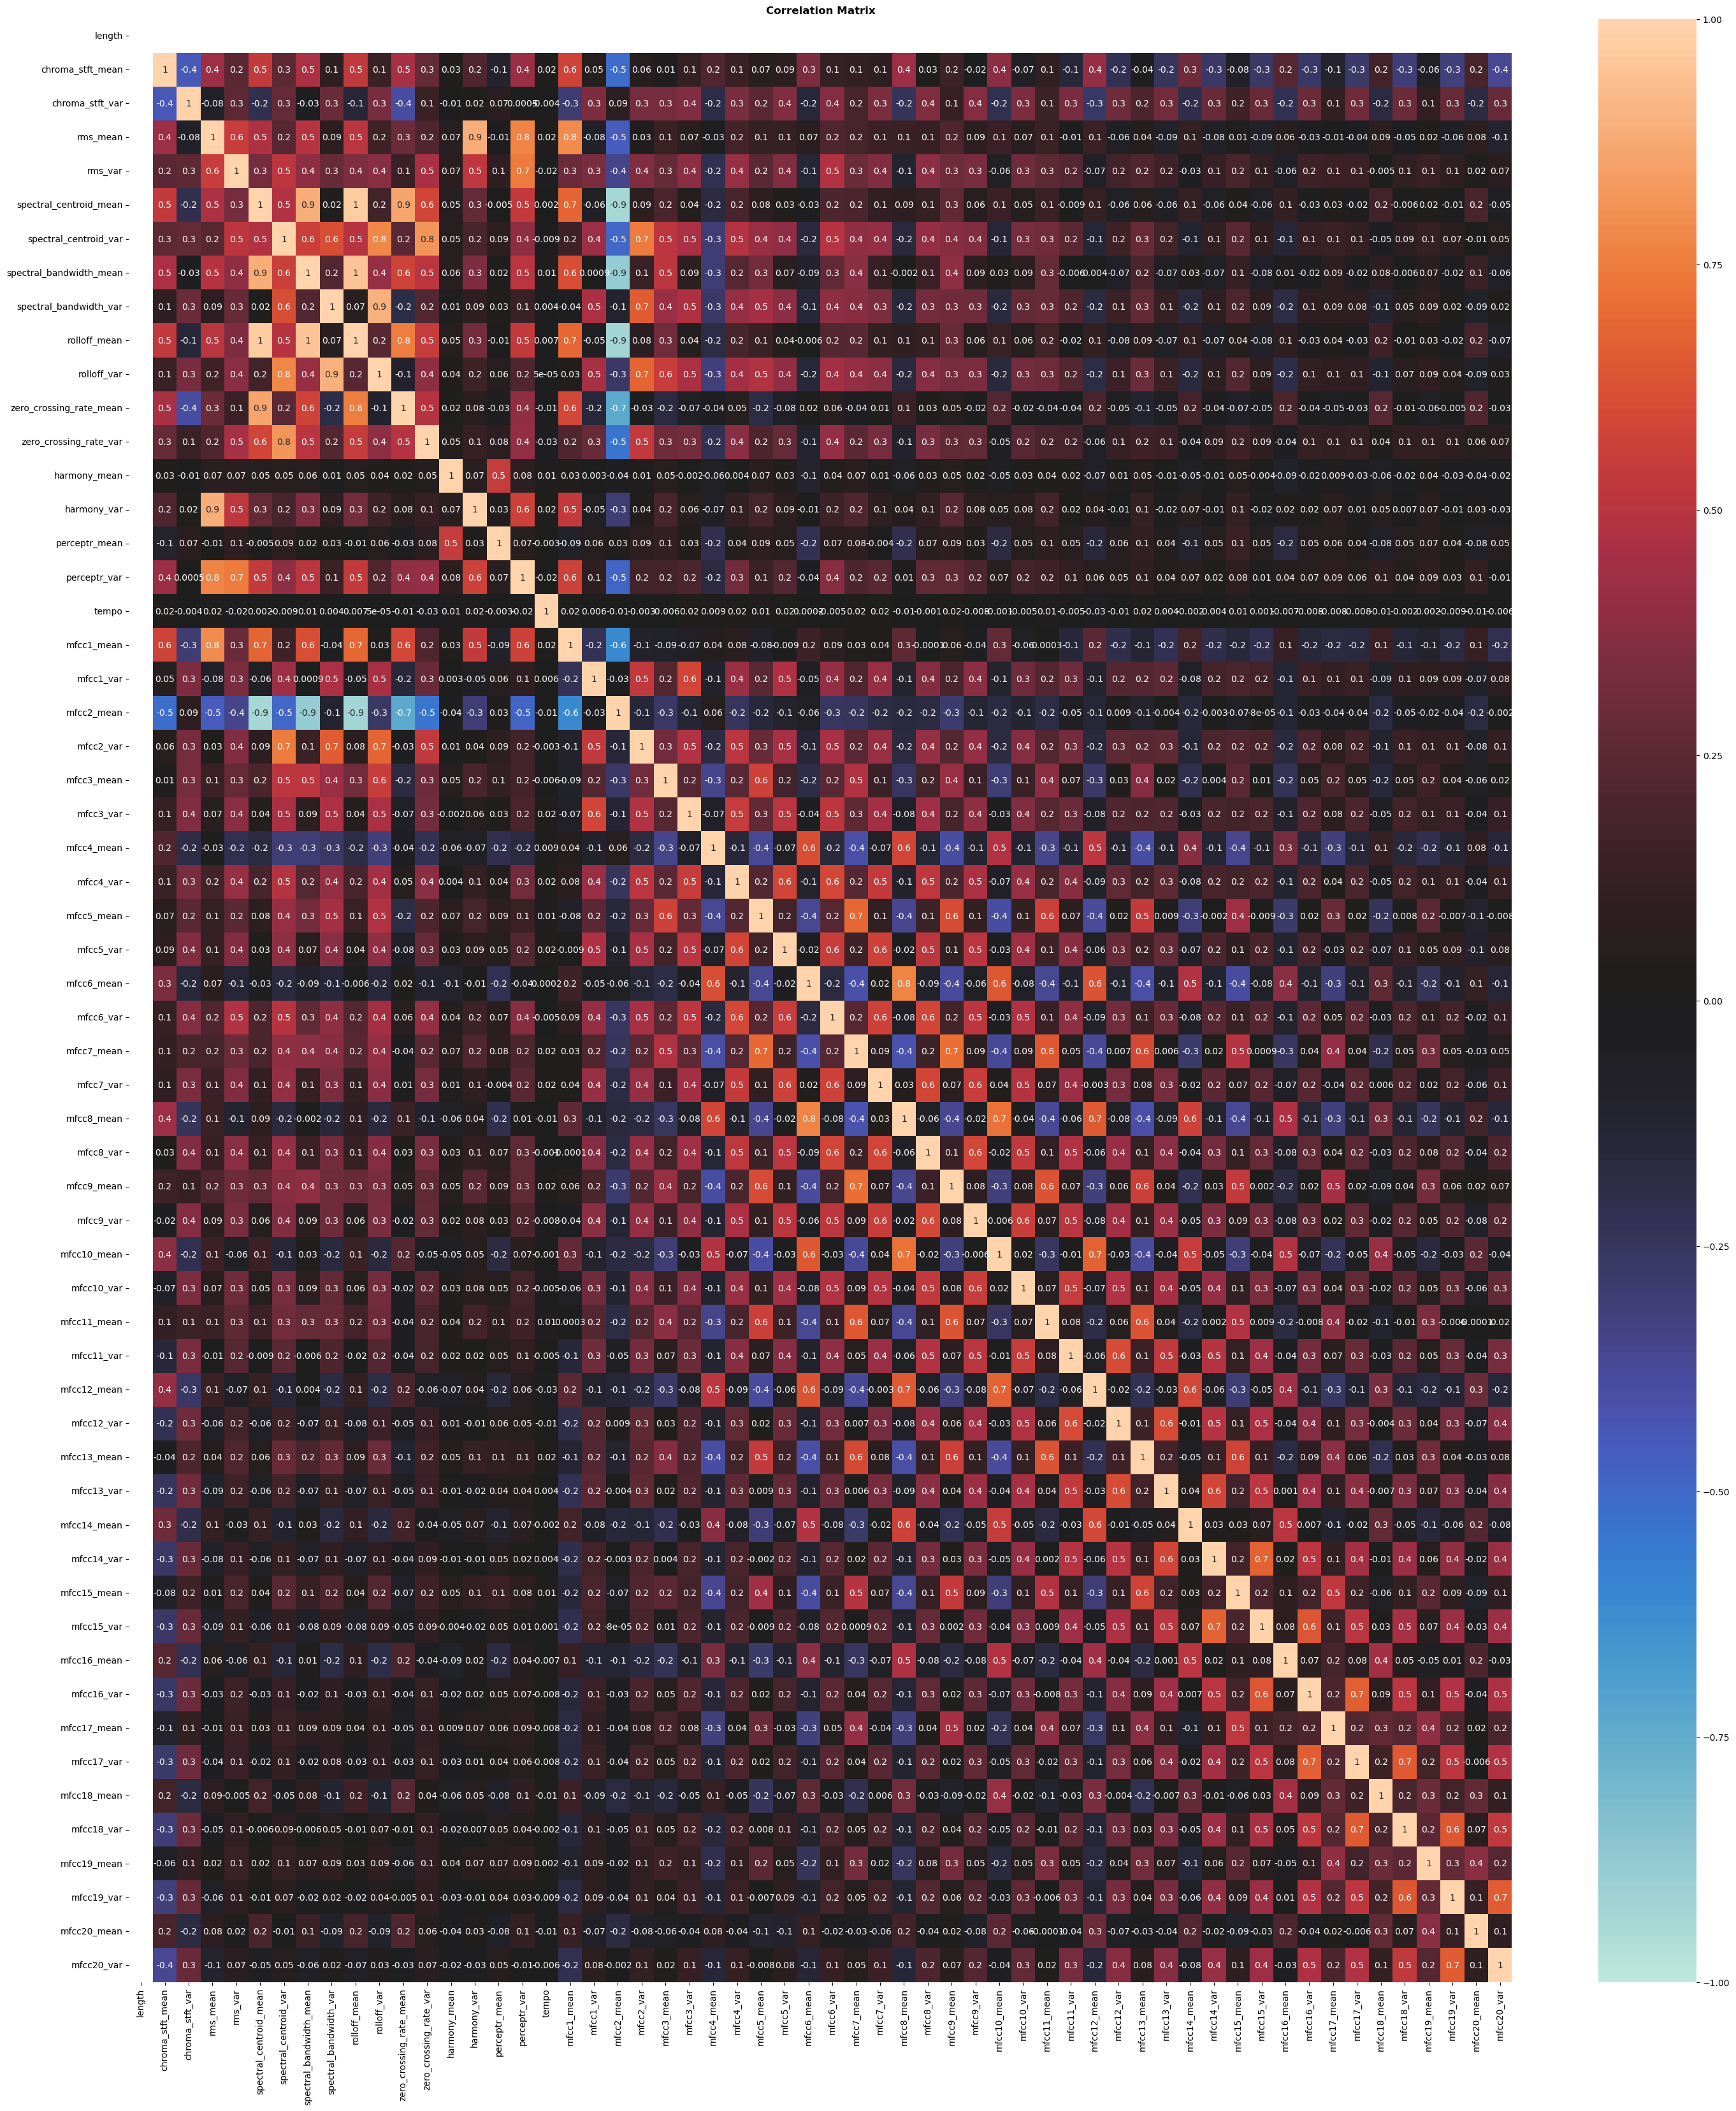

In [279]:
plt.figure(figsize=(35,40))
sns.heatmap(df.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')
plt.show()



In the heat map, warm colors represent high values and cool values represent low values. Values in a correlation matrix range from -1 to 1. A value of one indicates a perfect positive correlation meaning as one value increases, the other also increases. A value of -1 indicates a perfect negative correlation meaning as one value increases, the other decreases. A value of 0 indicates no correlation between the variables.



In [280]:
corr_mat = df.corr()
corr_pairs = corr_mat.unstack()
pos_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Strong Positive Correlation is observed in the following pairs: \n", pos_corr)

neg_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nStrong Negative Correlation is observed in the following pairs: \n", neg_corr)

Strong Positive Correlation is observed in the following pairs: 
 chroma_stft_mean  spectral_centroid_mean    0.534670
                  rolloff_mean              0.526881
                  mfcc1_mean                0.573974
rms_mean          rms_var                   0.553770
                  rolloff_mean              0.500178
                                              ...   
mfcc19_var        mfcc17_var                0.508315
                  mfcc18_var                0.648110
                  mfcc20_var                0.658459
mfcc20_var        mfcc18_var                0.526891
                  mfcc19_var                0.658459
Length: 220, dtype: float64

Strong Negative Correlation is observed in the following pairs: 
 chroma_stft_mean         mfcc2_mean                -0.513978
spectral_centroid_mean   mfcc2_mean                -0.931435
spectral_bandwidth_mean  mfcc2_mean                -0.887156
rolloff_mean             mfcc2_mean                -0.923652
zero_crossin

In [281]:
#Country
audio_recording="..\Jenni_Project\Data\genres_original\country\country.00001.wav"
data, sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [282]:
#Hiphop
audio_recording1="..\Jenni_Project\Data\genres_original\hiphop\hiphop.00000.wav"
data1, sr=librosa.load(audio_recording1)
print(type(data1),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [283]:
#Pop
audio_recording2="..\Jenni_Project\Data\genres_original\pop\pop.00001.wav"
data2, sr=librosa.load(audio_recording2)
print(type(data2),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [284]:
#Disco
audio_recording3="..\Jenni_Project\Data\genres_original\disco\disco.00001.wav"
data3, sr=librosa.load(audio_recording3)
print(type(data3),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [285]:
IPython.display.Audio(data,rate=sr) #country

### VISUALIZING AUDIO FILES

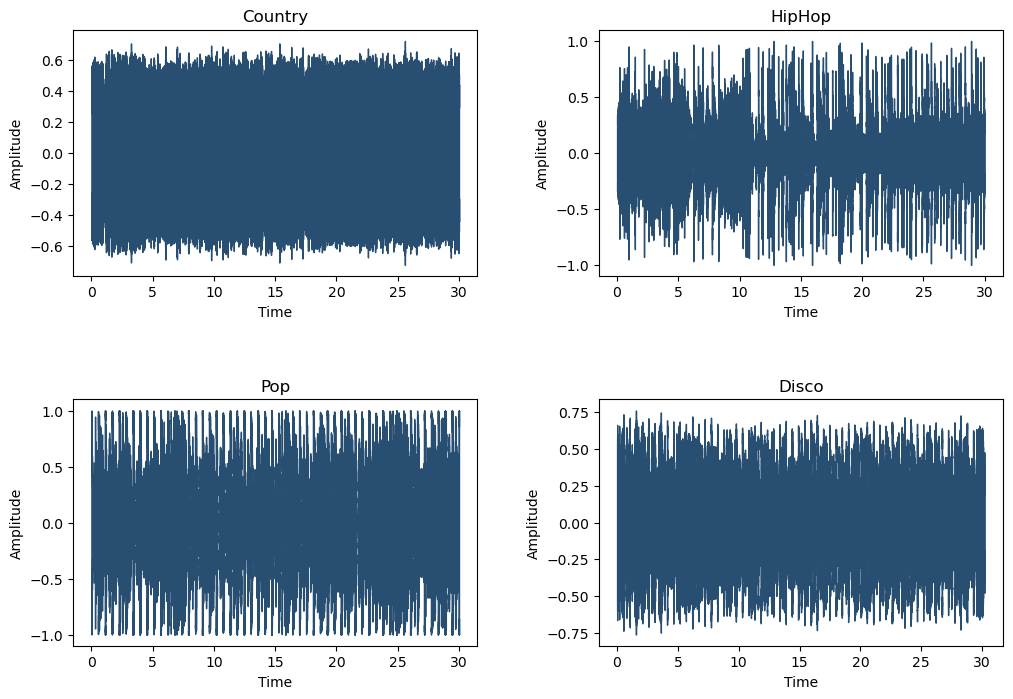

In [286]:
from matplotlib import gridspec

fig = plt.figure()
 
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(8)
 
# set width of each subplot as 12
fig.set_figwidth(12)
 
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=2,
                         width_ratios=[1, 1], wspace=0.3,
                         hspace=0.5, height_ratios=[1, 1])


ax0=fig.add_subplot(spec[0])
librosa.display.waveshow(data,color="#284F72")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Country")


ax1=fig.add_subplot(spec[1])
librosa.display.waveshow(data1,color="#284F72")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("HipHop")


ax2=fig.add_subplot(spec[2])
librosa.display.waveshow(data2,color="#284F72")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Pop")


ax3=fig.add_subplot(spec[3])
librosa.display.waveshow(data3,color="#284F72")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Disco")
plt.show()

**Inference** Waveforms are visual representations of sound as time on the x-axis and amplitude on the y-axis. They are great for allowing us to quickly scan the audio data and visually compare and contrast which genres might be more similar than others. 

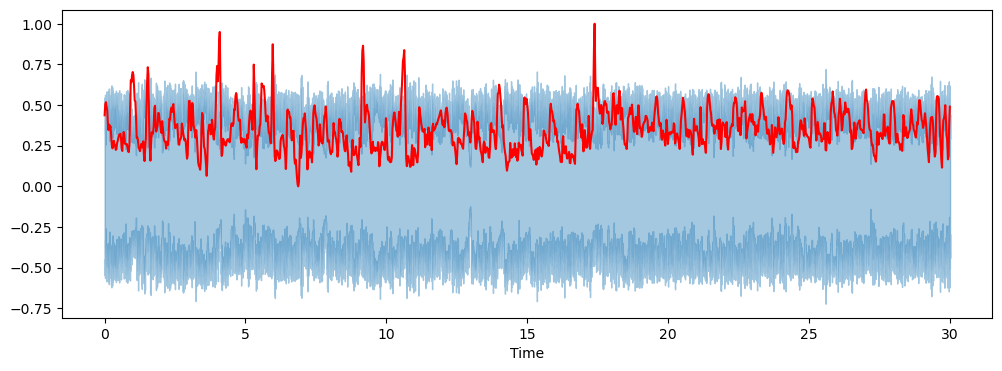

In [295]:
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(data, sr=sr, alpha=0.4)
plt.rcParams["figure.figsize"] = [13, 4]
plt.plot(t, normalize(spectral_centroids), color='r')

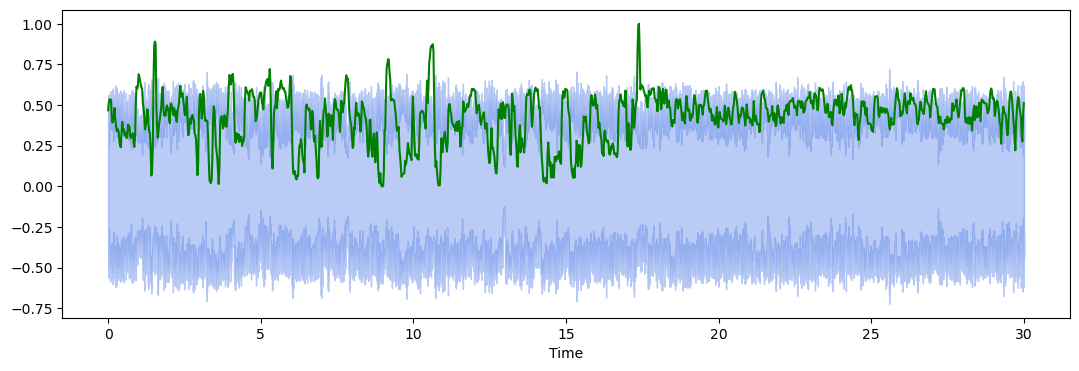

In [299]:
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
librosa.display.waveshow(data, sr=sr, alpha=0.4, color="#537FE7")
plt.rcParams["figure.figsize"] = [12, 4]
plt.plot(t, normalize(spectral_rolloff), color='g')

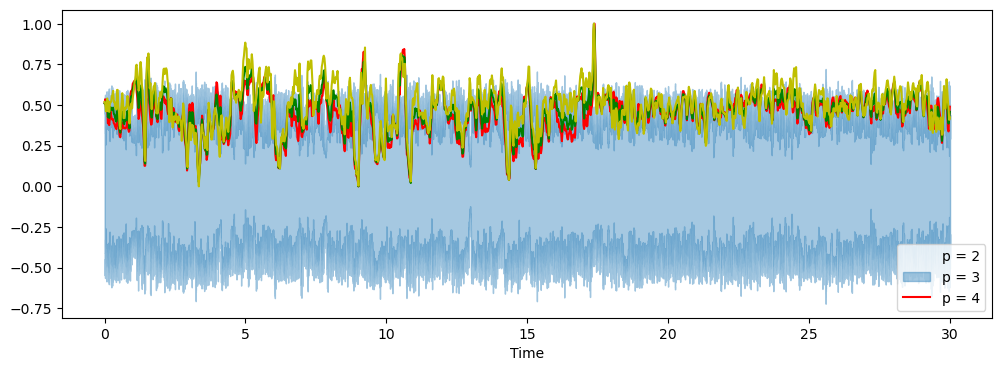

In [301]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data+0.01, sr=sr, p=4)[0]
librosa.display.waveshow(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

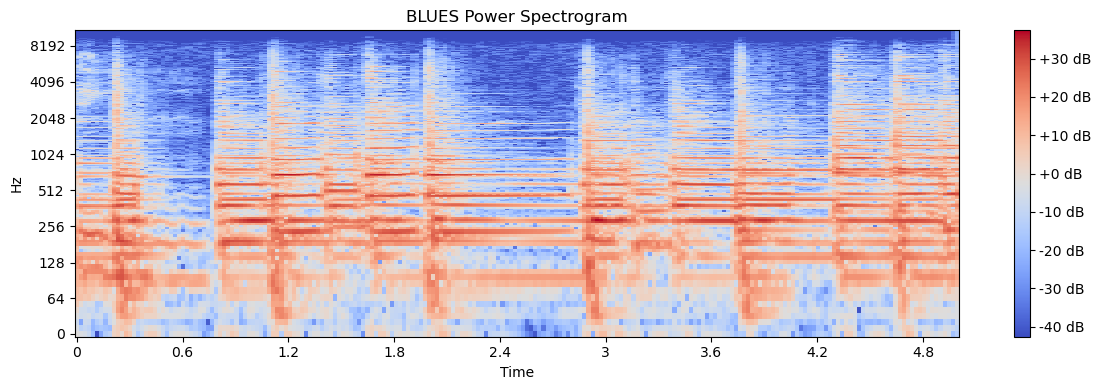

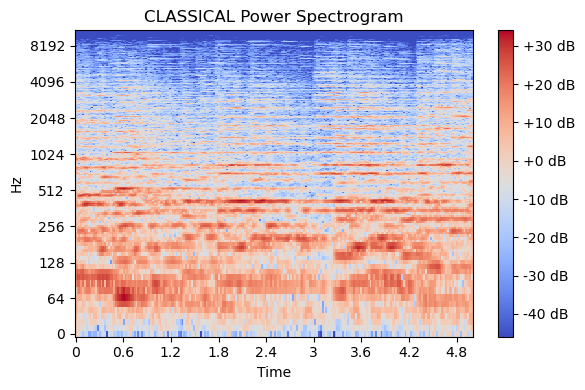

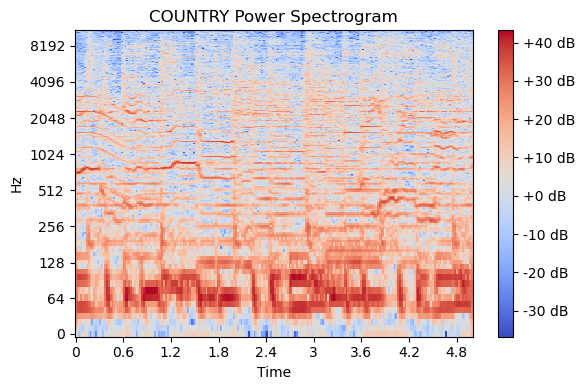

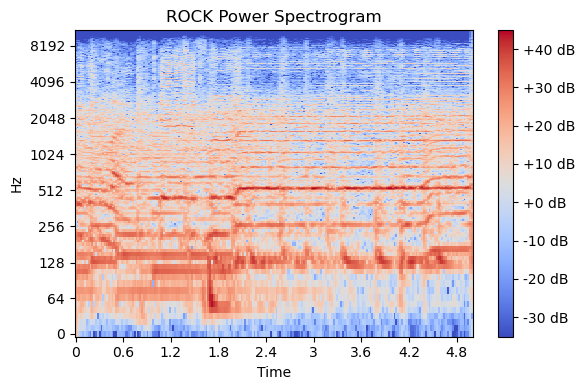

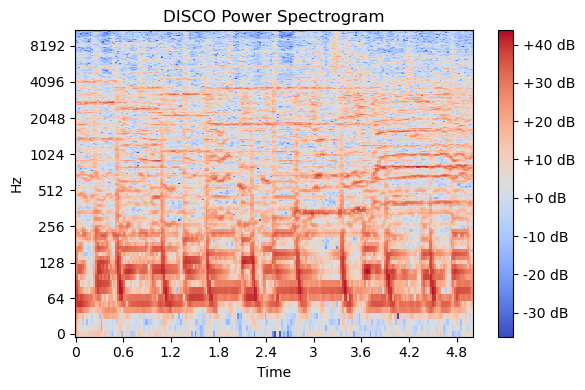

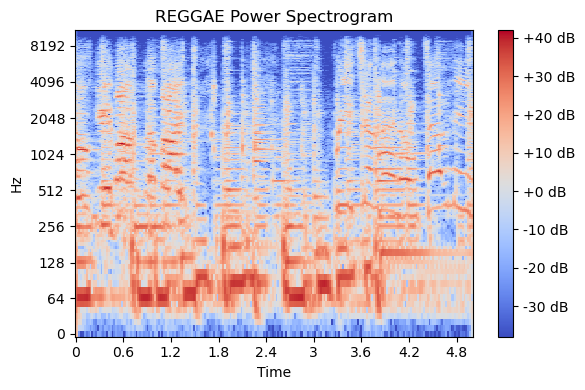

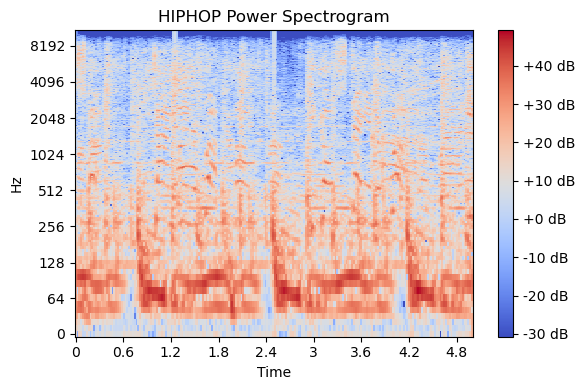

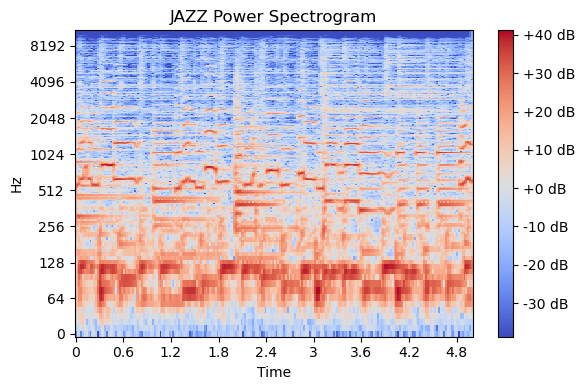

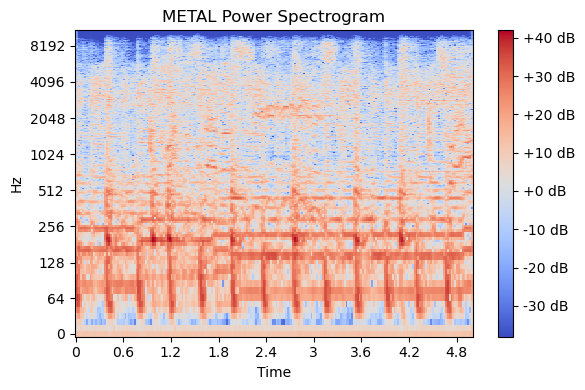

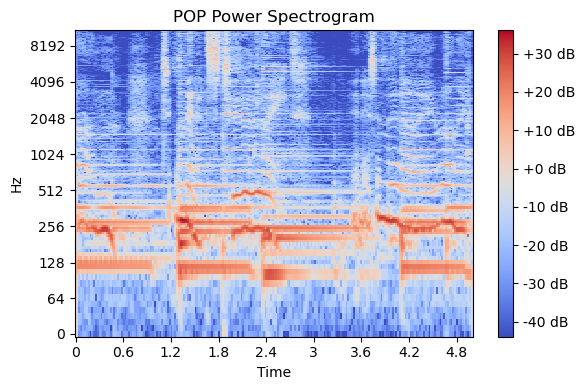

In [302]:
import warnings
warnings.filterwarnings("ignore")
genres='blues classical country rock disco reggae hiphop jazz metal pop'.split()
for i,genre in enumerate(genres):
    y,sr=librosa.load('data/genres_original/'+genre+'/'+genre+'.00005.wav',duration=5.0,sr=None,)
    librosa.display.specshow(librosa.amplitude_to_db(abs(librosa.stft(y)),ref=1.0),
                         y_axis='log', x_axis='time')
    plt.title(genre.upper()+" Power Spectrogram")
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.savefig(fname=genre+'_power_spectrogram',quality=95,dpi=200)
    plt.rcParams["figure.figsize"] = [6, 4]
    plt.show()

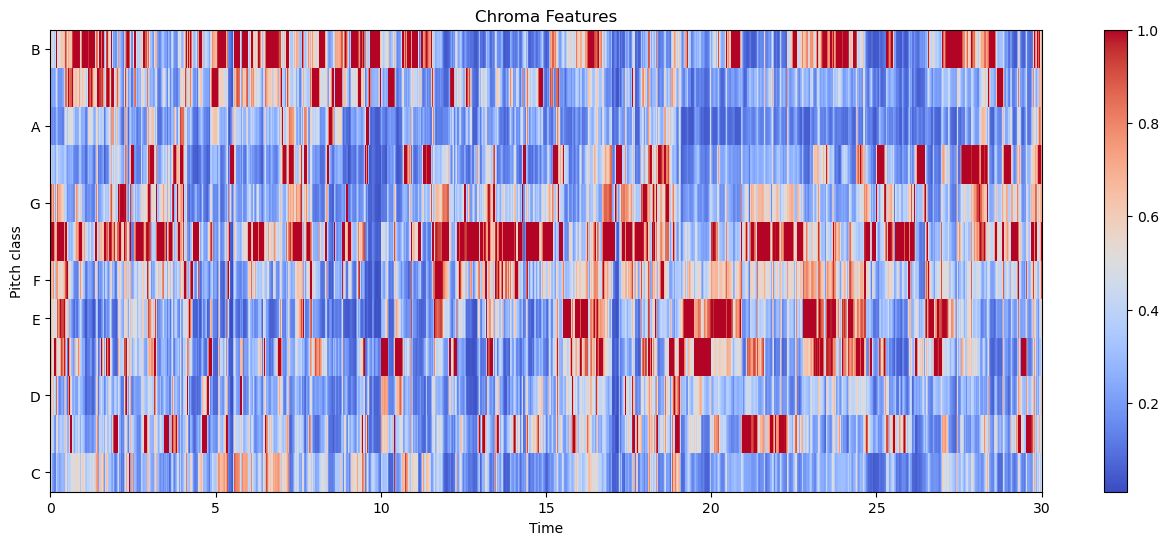

In [303]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

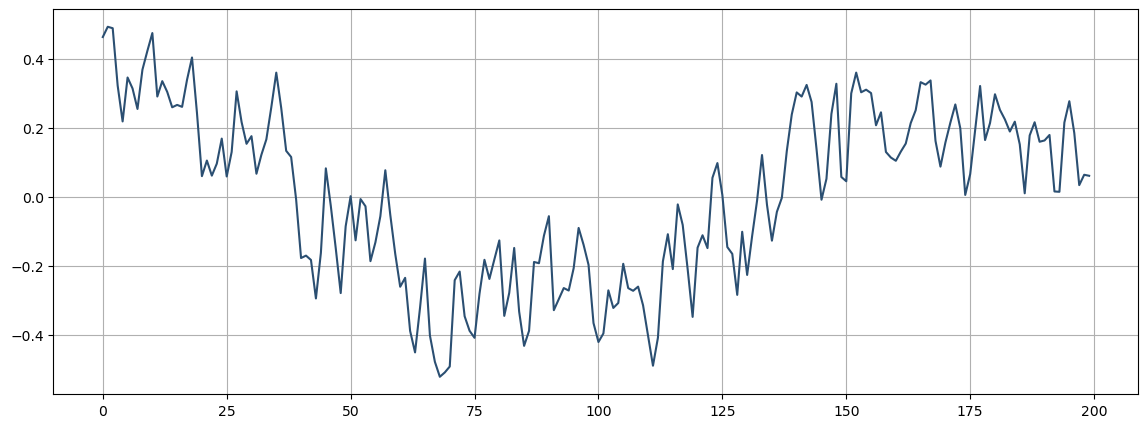

In [304]:
start = 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end], color="#2B4F72")
plt.grid()

In [305]:
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("The number of zero-crossing is:",sum(zero_cross_rate))

The number of zero-crossing is: 14


(20, 1293)


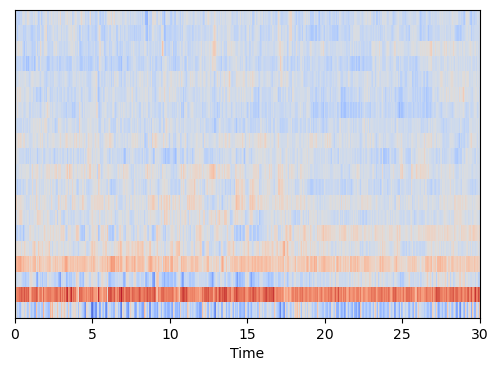

In [306]:
x, fs = librosa.load('..\Jenni_Project\Data\genres_original\country\country.00001.wav')
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[-1.4751342e-09  0.0000000e+00  1.1801074e-08  0.0000000e+00
 -5.9005369e-09  1.1801074e-08 -1.1801074e-08 -2.9502685e-09
  5.9005369e-09 -1.1801074e-08  0.0000000e+00  0.0000000e+00
  5.9005369e-09  0.0000000e+00  0.0000000e+00  5.9005369e-09
  5.9005369e-09  0.0000000e+00 -7.3756716e-09 -5.9005369e-09]
[1.        1.        1.        0.9999999 1.        1.        1.
 1.0000002 1.        1.        1.        0.9999998 0.9999998 1.
 1.0000001 0.9999999 1.        1.        1.        1.       ]


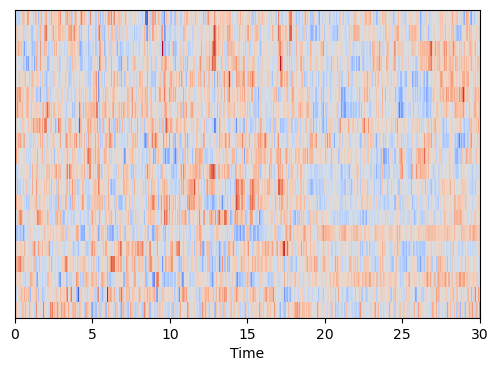

In [307]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

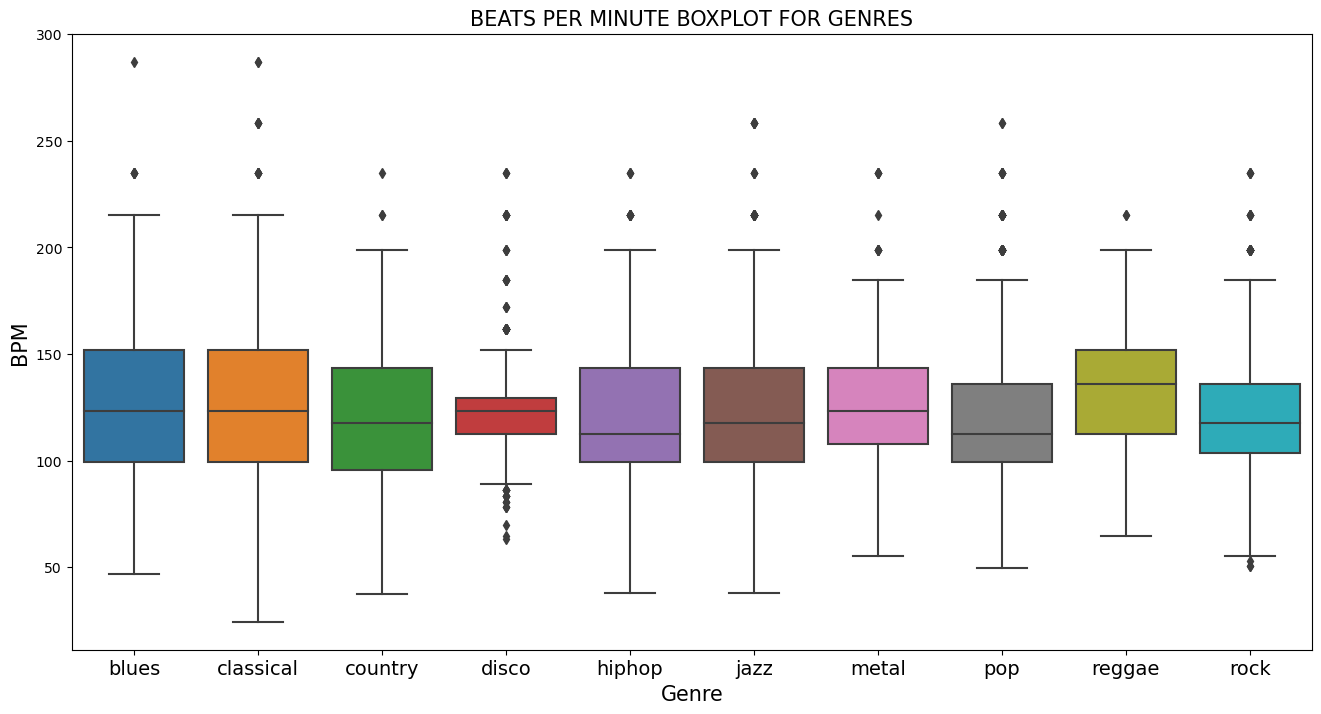

In [308]:
# A box plot to show the distribution of music pieces in different genres in different tempo/beats per minute values.
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x);

plt.title('BEATS PER MINUTE BOXPLOT FOR GENRES', fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

### **Feature Extraction**


In [309]:
class_list=df.iloc[:,-1]
convertor=LabelEncoder()

In [310]:
y=convertor.fit_transform(class_list)

In [311]:
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032           167541.63090              19


### **Feature Scaling**

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [313]:

from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [314]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [315]:
len(y_train)

6993

In [316]:
len(y_test)

2997

Training Accuracy: 0.7483197483197483
Testing Accuracy: 0.7167167167167167


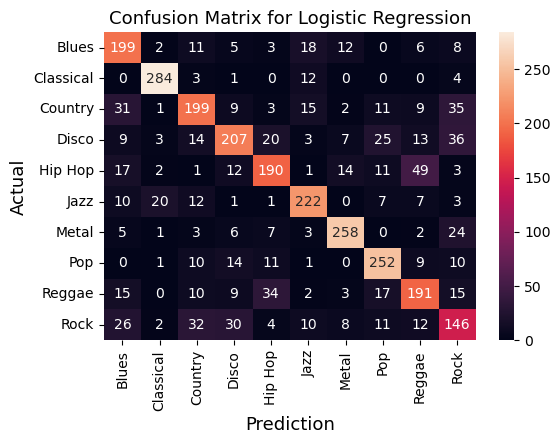

In [317]:
LR_Model = LogisticRegression()
LR_Model.fit(x_train, y_train)
LR_Predict1 = LR_Model.predict(x_train)
LR_Accuracy1 = accuracy_score(y_train, LR_Predict1)
print("Training Accuracy: " + str(LR_Accuracy1))

LR_Predict = LR_Model.predict(x_test)
LR_Accuracy = accuracy_score(y_test, LR_Predict)
print("Testing Accuracy: " + str(LR_Accuracy))

cm = confusion_matrix(y_test,LR_Predict)

sns.heatmap(cm, 
            annot=True,
            fmt='g',
            xticklabels=['Blues','Classical','Country','Disco','Hip Hop','Jazz','Metal','Pop','Reggae','Rock'],
            yticklabels=['Blues','Classical','Country','Disco','Hip Hop','Jazz','Metal','Pop','Reggae','Rock']
           )
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix for Logistic Regression',fontsize=13)
plt.show()

Training Accuracy: 0.9173459173459173
Testing Accuracy: 0.8541875208541875


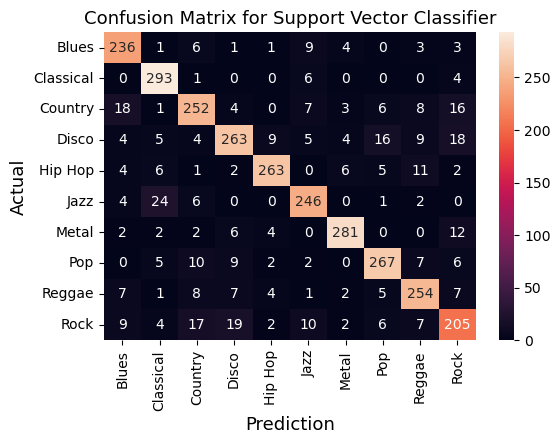

In [318]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

svm_Predict1 = svm_classifier.predict(x_train)
svm_Accuracy1 = accuracy_score(y_train, svm_Predict1)
print("Training Accuracy: " + str(svm_Accuracy1))

svm_Predict = svm_classifier.predict(x_test)
svm_Accuracy = accuracy_score(y_test, svm_Predict)
print("Testing Accuracy: " + str(svm_Accuracy))

cm = confusion_matrix(y_test,svm_Predict)
sns.heatmap(cm, 
            annot=True,
            fmt='g',
            xticklabels=['Blues','Classical','Country','Disco','Hip Hop','Jazz','Metal','Pop','Reggae','Rock'],
            yticklabels=['Blues','Classical','Country','Disco','Hip Hop','Jazz','Metal','Pop','Reggae','Rock']
           )
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix for Support Vector Classifier',fontsize=13)
plt.show()

Training Accuracy: 0.998998998998999
Testing Accuracy: 0.8595261928595261


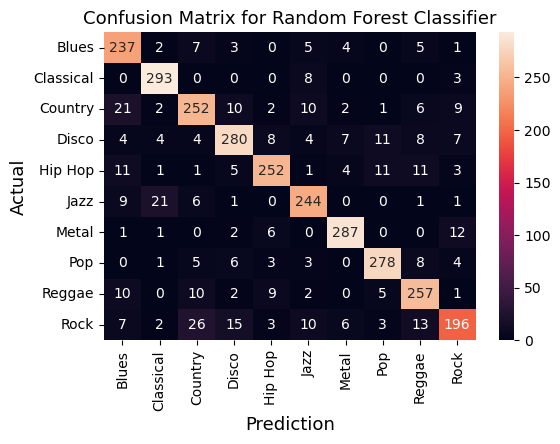

In [319]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(x_train, y_train)

RFC_Predict1 = RFC_Model.predict(x_train)
RFC_Accuracy1 = accuracy_score(y_train, RFC_Predict1)
print("Training Accuracy: " + str(RFC_Accuracy1))

RFC_Predict = RFC_Model.predict(x_test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Testing Accuracy: " + str(RFC_Accuracy))

cm = confusion_matrix(y_test,RFC_Predict)
sns.heatmap(cm, 
            annot=True,
            fmt='g',
            xticklabels=['Blues','Classical','Country','Disco','Hip Hop','Jazz','Metal','Pop','Reggae','Rock'],
            yticklabels=['Blues','Classical','Country','Disco','Hip Hop','Jazz','Metal','Pop','Reggae','Rock']
           )
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix for Random Forest Classifier',fontsize=13)
plt.show()

Training Accuracy: 0.9303589303589304
Testing Accuracy: 0.8842175508842175


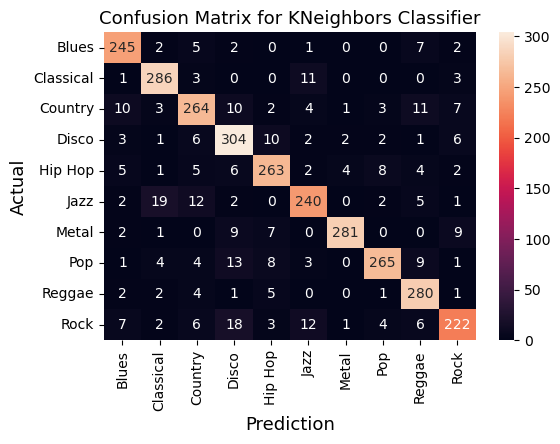

In [320]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(x_train, y_train)

KNN_Predict1 = KNN_Model.predict(x_train)
KNN_Accuracy1 = accuracy_score(y_train, KNN_Predict1)
print("Training Accuracy: " + str(KNN_Accuracy1))

KNN_Predict = KNN_Model.predict(x_test)
KNN_Accuracy = accuracy_score(y_test, KNN_Predict)
print("Testing Accuracy: " + str(KNN_Accuracy))

cm = confusion_matrix(y_test,KNN_Predict)
sns.heatmap(cm, 
            annot=True,
            fmt='g',
            xticklabels=['Blues','Classical','Country','Disco','Hip Hop','Jazz','Metal','Pop','Reggae','Rock'],
            yticklabels=['Blues','Classical','Country','Disco','Hip Hop','Jazz','Metal','Pop','Reggae','Rock']
           )
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix for KNeighbors Classifier',fontsize=13)
plt.show()

In [321]:
print('Classification report Logistic Regression: \n',classification_report(y_test,LR_Predict))
print('\nClassification report Support Vector Machine: \n',classification_report(y_test,svm_Predict))
print('\nClassification report Random Forest: \n',classification_report(y_test,RFC_Predict))
print('\nClassification report K-Nearest Neighbour: \n',classification_report(y_test,KNN_Predict))

Classification report Logistic Regression: 
               precision    recall  f1-score   support

           0       0.64      0.75      0.69       264
           1       0.90      0.93      0.92       304
           2       0.67      0.63      0.65       315
           3       0.70      0.61      0.66       337
           4       0.70      0.63      0.66       300
           5       0.77      0.78      0.78       283
           6       0.85      0.83      0.84       309
           7       0.75      0.82      0.79       308
           8       0.64      0.65      0.64       296
           9       0.51      0.52      0.52       281

    accuracy                           0.72      2997
   macro avg       0.71      0.72      0.71      2997
weighted avg       0.72      0.72      0.72      2997


Classification report Support Vector Machine: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       264
           1       0.86      0.96     